In [1]:
# Importing the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
from subprocess import check_output

In [2]:
data = pd.read_csv("loan.csv")
data_1 = pd.DataFrame(data) # Creating a copy
#data = data.iloc[:,2:-30].values

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Consider only 2 major categories "Charged off" and "Fully Paid". Several reasons to do this:

To convert it into a binary cassification problem, and to analyze in detail the effect of important variables on the loan status.

A lot of observations show status "Current", so we do not know whether it will be "Charged Off", "Fully Paid" or "Default".

The observations for "Default" are too less as compared to "Fully Paid" or "Charged Off", to thoughroly investigate those observations with loan status as "Default".

The remaining categories of "loan status" are not of prime importance for this analysis.

In [48]:
category_one_data = data_1[data_1.loan_status == "Fully Paid"]
category_two_data = data_1[data_1.loan_status == "Charged Off"]
new_data = np.vstack((category_one_data,category_two_data))
# new_data_copy = pd.DataFrame(new_data)
new_data = new_data[:,2:-30]
new_data_df = pd.DataFrame(new_data)

### Variable under inspection: Home Status

          0       1
0       ANY     267
1  MORTGAGE  645496
2      NONE      48
3     OTHER     144
4       OWN  139844
5      RENT  517808


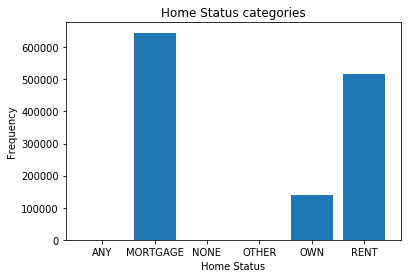

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [233]:
home_status = new_data_df[10]
# print(np.unique(home_status, return_counts = True))
home_status_list = np.array(np.unique(home_status, return_counts = True))
home_status_df = pd.DataFrame(home_status_list.T)
print(home_status_df)

# Distribution of Emp_length
plt.figure()
plt.bar(home_status_df[0],home_status_df[1])
plt.xlabel('Home Status')
plt.ylabel('Frequency')
plt.title('Home Status categories')
plt.show()

home_status = pd.DataFrame(home_status)
status_home_status = pd.DataFrame(np.hstack((home_status,status_labels)))
status_home_status.columns = ['Home Status','status_labels']

# Looking for a trend in the defaulted observations
Charged_off_home_status = status_home_status[status_home_status.status_labels == 1]
temp_41 = Charged_off_home_status.iloc[:,0].values
plot_var_home_status = np.array(np.unique(temp_41, return_counts = True))
plot_var_home_status_44 = pd.DataFrame(plot_var_home_status.T) 

# Looking for a trend in the successful observations
Fully_Paid_home_status = status_home_status[status_home_status.status_labels == 0]
temp_42 = Fully_Paid_home_status.iloc[:,0].values
plot_var_home_status_2 = np.array(np.unique(temp_42, return_counts = True))
plot_var_home_status_55 = pd.DataFrame(plot_var_home_status_2.T) # Eliminating the 10th, since as only one reading
plot_var_home_status_55 = plot_var_home_status_55.drop(0) # Eliminating the home status = "any", since as only one reading

# Concatenating the two variables
plot_var_stack_3 = np.hstack((plot_var_home_status_44,plot_var_home_status_55))
plot_var_stack_3 = pd.DataFrame(plot_var_stack_3)
plot_var_stack_3 = plot_var_stack_3.drop(plot_var_stack_3.columns[2], axis=1)
plot_var_stack_3.columns = ['Home Status','Charged Off','Fully Paid']

# Percent stacked
# From raw value to percentage
totals = [i+j for i,j in zip(plot_var_stack_3['Charged Off'], plot_var_stack_3['Fully Paid'])]
C_Off = [i / j * 100 for i,j in zip(plot_var_stack_3['Charged Off'], totals)]
mean_C_Off = np.mean(C_Off)
F_Paid = [i / j * 100 for i,j in zip(plot_var_stack_3['Fully Paid'], totals)]
#plot_var_stack_3 = np.array(plot_var_stack_3)
group_number = plot_var_stack_3['Home Status']
p1 = plt.bar(group_number, C_Off, color='#7f6d5f', edgecolor='white', width=0.5)
p2 = plt.bar(group_number, F_Paid, bottom=C_Off, color='#557f2d', edgecolor='white', width=0.5)
#Axes.axhline(y=mean_C_Off)
plt.xlabel('Home Status')
plt.ylabel('Percent loan status')
plt.title('Home Status categories')
plt.legend((p1, p2), ('Charged Off', 'Fully Paid'), loc = 'upper right')
plt.show()

### Variable under inspection: Grade. 
**Whether the grade affects the Installment amount?

   0       1
0  A  226243
1  B  380152
2  C  369928
3  D  195280
4  E   91570
5  F   31483
6  G    8951


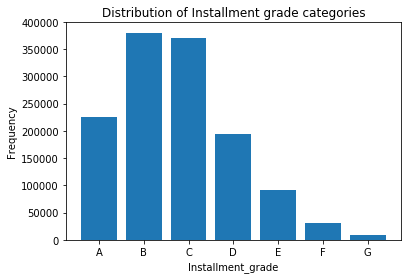

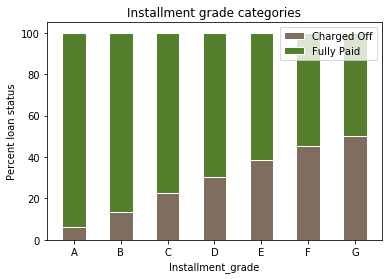

In [37]:
installment_grade = new_data[:,6]
# print(np.unique(installment_grade, return_counts = True))
installment_grade_list = np.array(np.unique(installment_grade, return_counts = True))
installment_grade_df = pd.DataFrame(installment_grade_list.T)
print(installment_grade_df)

# Distribution of Installment grade
plt.figure()
plt.bar(installment_grade_df[0],installment_grade_df[1])
plt.xlabel('Installment_grade')
plt.ylabel('Frequency')
plt.title('Distribution of Installment grade categories')
plt.show()

installment_grade = pd.DataFrame(installment_grade)
status_installment_grade = pd.DataFrame(np.hstack((installment_grade,status_labels)))
status_installment_grade.columns = ['Installment_grade','status_labels']

# Looking for a trend in the defaulted observations
Charged_off_grade = status_installment_grade[status_installment_grade.status_labels == 1]
temp_11 = Charged_off_grade.iloc[:,0].values
plot_var_grade = np.array(np.unique(temp_11, return_counts = True))
plot_var_grade_11 = plot_var_grade.T 

# Looking for a trend in the successful observations
Fully_Paid_grade = status_installment_grade[status_installment_grade.status_labels == 0]
temp_22 = Fully_Paid_grade.iloc[:,0].values
plot_var_grade_2 = np.array(np.unique(temp_22, return_counts = True))
plot_var_grade_22 = plot_var_grade_2.T # Eliminating the 10th, since as only one reading

# Concatenating the two variables
plot_var_stack_1 = np.hstack((plot_var_grade_11,plot_var_grade_22))
plot_var_stack_1 = pd.DataFrame(plot_var_stack_1)
plot_var_stack_1 = plot_var_stack_1.drop(plot_var_stack_1.columns[2], axis=1)
plot_var_stack_1.columns = ['Installment_grade_grp','Charged Off','Fully Paid']

# Percent stacked
# From raw value to percentage
totals = [i+j for i,j in zip(plot_var_stack_1['Charged Off'], plot_var_stack_1['Fully Paid'])]
C_Off = [i / j * 100 for i,j in zip(plot_var_stack_1['Charged Off'], totals)]
mean_C_Off = np.mean(C_Off)
F_Paid = [i / j * 100 for i,j in zip(plot_var_stack_1['Fully Paid'], totals)]
# plot_var_stack_1 = np.array(plot_var_stack_1)
group_number = plot_var_stack_1['Installment_grade_grp']
p1 = plt.bar(group_number, C_Off, color='#7f6d5f', edgecolor='white', width=0.5)
p2 = plt.bar(group_number, F_Paid, bottom=C_Off, color='#557f2d', edgecolor='white', width=0.5)
#Axes.axhline(y=mean_C_Off)
plt.xlabel('Installment_grade')
plt.ylabel('Percent loan status')
plt.title('Installment grade categories')
plt.legend((p1, p2), ('Charged Off', 'Fully Paid'), loc = 'upper right')
plt.show()

### Variable under inspection: Sub_grade
**Whether the sub_grade affects the Installment amount?

1. The grade does seem to affect the default rate: Higher the grade higher the percentage of "Charged Off" loans.
2. From the plot we can conclude that Grade G has the highest "% Charged Off"
3. To further investigate this we need to know what the Grade refers to, does it represent risk factor in lending the money ? If yes, then the results make sense: Higher the grade higher the risk factor.
4. From the distribution plot we can see that they are already lending only a handful amount of loans to people classified in "Grade G". They should be more precautious in their approach to lending money to customers who are classified to be in higher grades.

     0      1
0   A1  41258
1   A2  35800
2   A3  36599
3   A4  50518
4   A5  62068
5   B1  68853
6   B2  71689
7   B3  79424
8   B4  80606
9   B5  79580
10  C1  82815
11  C2  76854
12  C3  72731
13  C4  72108
14  C5  65420
15  D1  49949
16  D2  43480
17  D3  38181
18  D4  34566
19  D5  29104
20  E1  23223
21  E2  20961
22  E3  17957
23  E4  15372
24  E5  14057
25  F1   9766
26  F2   7063
27  F3   5992
28  F4   4783
29  F5   3879
30  G1   2919
31  G2   2099
32  G3   1593
33  G4   1258
34  G5   1082


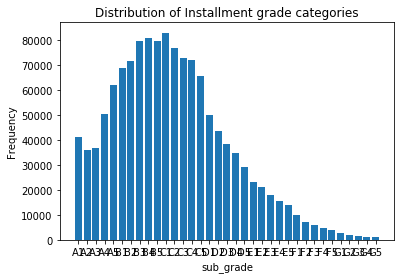

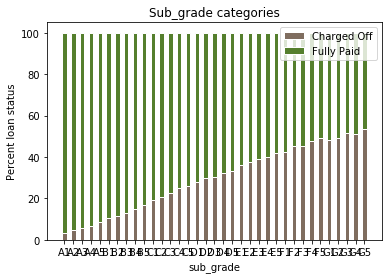

In [131]:
sub_grade = new_data[:,7]
# print(np.unique(installment_grade, return_counts = True))
sub_grade_list = np.array(np.unique(sub_grade, return_counts = True))
sub_grade_df = pd.DataFrame(sub_grade_list.T)
print(sub_grade_df)

# Distribution of Installment grade
plt.figure()
plt.bar(installment_grade_df[0],installment_grade_df[1])
plt.xlabel('sub_grade')
plt.ylabel('Frequency')
plt.title('Distribution of Installment grade categories')
plt.show()

installment_grade = pd.DataFrame(installment_grade)
status_installment_grade = pd.DataFrame(np.hstack((installment_grade,status_labels)))
status_installment_grade.columns = ['sub_grade','status_labels']

# Looking for a trend in the defaulted observations
Charged_off_grade = status_installment_grade[status_installment_grade.status_labels == 1]
temp_11 = Charged_off_grade.iloc[:,0].values
plot_var_grade = np.array(np.unique(temp_11, return_counts = True))
plot_var_grade_11 = plot_var_grade.T 

# Looking for a trend in the successful observations
Fully_Paid_grade = status_installment_grade[status_installment_grade.status_labels == 0]
temp_22 = Fully_Paid_grade.iloc[:,0].values
plot_var_grade_2 = np.array(np.unique(temp_22, return_counts = True))
plot_var_grade_22 = plot_var_grade_2.T # Eliminating the 10th, since as only one reading

# Concatenating the two variables
plot_var_stack_1 = np.hstack((plot_var_grade_11,plot_var_grade_22))
plot_var_stack_1 = pd.DataFrame(plot_var_stack_1)
plot_var_stack_1 = plot_var_stack_1.drop(plot_var_stack_1.columns[2], axis=1)
plot_var_stack_1.columns = ['sub_grade','Charged Off','Fully Paid']

# Percent stacked
# From raw value to percentage
totals = [i+j for i,j in zip(plot_var_stack_1['Charged Off'], plot_var_stack_1['Fully Paid'])]
C_Off = [i / j * 100 for i,j in zip(plot_var_stack_1['Charged Off'], totals)]
mean_C_Off = np.mean(C_Off)
F_Paid = [i / j * 100 for i,j in zip(plot_var_stack_1['Fully Paid'], totals)]
# plot_var_stack_1 = np.array(plot_var_stack_1)
group_number = plot_var_stack_1['sub_grade']
p1 = plt.bar(group_number, C_Off, color='#7f6d5f', edgecolor='white', width=0.5)
p2 = plt.bar(group_number, F_Paid, bottom=C_Off, color='#557f2d', edgecolor='white', width=0.5)
#Axes.axhline(y=mean_C_Off)
plt.xlabel('sub_grade')
plt.ylabel('Percent loan status')
plt.title('Sub_grade categories')
plt.legend((p1, p2), ('Charged Off', 'Fully Paid'), loc = 'upper right')
plt.show()

**The sub_grade does seem to affect the default rate: Higher the grade higher the percentage of "Charged Off" loans.

### Variable under inspection:Annual Income

**To investigate this variable we create four bins to classify the annual income:

**People earning less than USD 40,000.
**People earning between USD 40,000 to USD 70,000.
**People earning between USD 70,000 to USD 100,000.
**People earning more than USD 100,000,

No handles with labels found to put in legend.


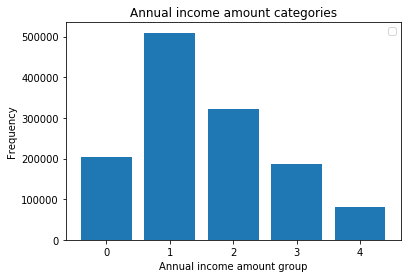

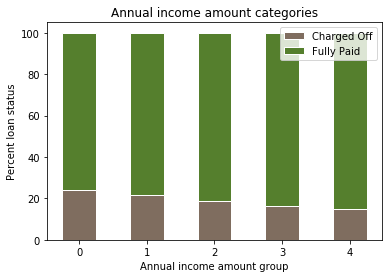

In [38]:
## Now checking the effect of annual income on loan status
# Creating bins for various income amounts
annual_income = new_data[:,11]
#bins_2 = np.linspace(annual_income.min(), annual_income.max(), 3)
bins_2 = np.array([40000,70000,100000,150000])
annual_income = annual_income.astype(float).reshape(annual_income.size,1)
binned_annual_income = pd.DataFrame(np.digitize(annual_income, bins_2))                  
annual_groups = (np.array(np.unique(binned_annual_income, return_counts = True))).T

# A bar plot to figure out the distribution of income amount
plt.figure()
plt.bar(annual_groups[:,0],annual_groups[:,1])
plt.xlabel('Annual income amount group')
plt.ylabel('Frequency')
plt.title('Annual income amount categories')
plt.legend(loc="upper right")
plt.show()

# Appending the income_groups to status
status_annual_groups = pd.DataFrame(np.hstack((binned_annual_income,status_labels)))
status_annual_groups.columns = ['Annual_income_grp','status_labels'] 

# Looking for a trend in the defaulted observations
Charged_off_annual_income = status_annual_groups[status_annual_groups.status_labels == 1]
temp_51 = Charged_off_annual_income.iloc[:,0].values
plot_var_annual_income = np.array(np.unique(temp_51, return_counts = True))
plot_var_annual_income_66 = pd.DataFrame(plot_var_annual_income.T) 

# Looking for a trend in the successful observations
Fully_Paid_annual_income = status_annual_groups[status_annual_groups.status_labels == 0]
temp_52 = Fully_Paid_annual_income.iloc[:,0].values
plot_var_annual_income_2 = np.array(np.unique(temp_52, return_counts = True))
plot_var_annual_income_77 = pd.DataFrame(plot_var_annual_income_2.T) # Eliminating the 10th, since as only one reading
#plot_var_annual_income_55 = plot_var_home_status_55.drop(0) # Eliminating the home status = "any", since as only one reading

# Concatenating the two variables
plot_var_stack_4 = np.hstack((plot_var_annual_income_66,plot_var_annual_income_77))
plot_var_stack_4 = pd.DataFrame(plot_var_stack_4)
plot_var_stack_4 = plot_var_stack_4.drop(plot_var_stack_4.columns[2], axis=1)
plot_var_stack_4.columns = ['Annual Income Group','Charged Off','Fully Paid']

# Percent stacked
# From raw value to percentage
totals = [i+j for i,j in zip(plot_var_stack_4['Charged Off'], plot_var_stack_4['Fully Paid'])]
C_Off = [i / j * 100 for i,j in zip(plot_var_stack_4['Charged Off'], totals)]
mean_C_Off = np.mean(C_Off)
F_Paid = [i / j * 100 for i,j in zip(plot_var_stack_4['Fully Paid'], totals)]
#plot_var_stack_4 = np.array(plot_var_stack_4)
group_number = plot_var_stack_4['Annual Income Group']
p1 = plt.bar(group_number, C_Off, color='#7f6d5f', edgecolor='white', width=0.5)
p2 = plt.bar(group_number, F_Paid, bottom=C_Off, color='#557f2d', edgecolor='white', width=0.5)
#Axes.axhline(y=mean_C_Off)
plt.xlabel('Annual income amount group')
plt.ylabel('Percent loan status')
plt.title('Annual income amount categories')
plt.legend((p1, p2), ('Charged Off', 'Fully Paid'), loc = 'upper right')
plt.show()

** We can observe a slight downword trend, which suggests that people with higher income are less likely to get "Charged Off".

### Model Building 

In [2]:
df3 = pd.read_csv("loan.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
X = df3[['grade','sub_grade']]
X.head()

,grade,sub_grade
0,C,C1
1,D,D2
2,D,D1
3,D,D2
4,C,C4


In [5]:
Y = df3['loan_status']

In [6]:
#Transform categorial variables
from sklearn.feature_extraction import DictVectorizer
X = X.to_dict('records')
vec = DictVectorizer()
X = vec.fit_transform(X).toarray()

In [6]:
X[1]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [7]:
len(X)

2260668

In [8]:
# Label encoding the target variable 
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
print('Label Encoding', Y)

Label Encoding [1 1 1 ... 1 1 1]


In [9]:
#Splitting the dataset in training and testing set
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100, criterion = 'entropy')

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,Y_train)
#Predict Output
y_pred=clf.predict(X_test)

# get the accuracy
"{:.2%}".format(accuracy_score(Y_test, y_pred))

'46.41%'

### Neural Network

In [12]:
from sklearn.neural_network import MLPClassifier
X_test = X_test
y = Y_test
clf.mlp = MLPClassifier(solver='lbfgs', activation='logistic', batch_size= 100, 
verbose=10, hidden_layer_sizes= (100), random_state=0, early_stopping=True) 
clf.mlp.fit(X_train,Y_train)

"{:.2%}".format(clf.score(X_test, y))

'46.38%'

### Decision Tree

In [13]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 0,
                               max_depth=5, min_samples_leaf=5)
clf_gini.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

"{:.2%}".format(accuracy_score(Y_test, y_pred))

'46.41%'

### Using Cleaned data

In [14]:
df2 = pd.read_csv("clean_lending_dataset.csv")

In [22]:
#df2.ioc[7,15:56]
X2 = df2.iloc[:,16:56] 
Y2 = df2.iloc[:,74]

In [26]:
#Transform categorial variables
from sklearn.feature_extraction import DictVectorizer
X2 = X2.to_dict('records')
vec = DictVectorizer()
X2 = vec.fit_transform(X2).toarray()

In [33]:
len(Y2)

2260668

In [30]:
# Label encoding the target variable 
from sklearn.preprocessing import LabelEncoder
labelencoder_Y2 = LabelEncoder()
Y2 = labelencoder_Y2.fit_transform(Y)
print('Label Encoding', Y2)

Label Encoding [1 1 1 ... 1 1 1]


In [31]:
#Splitting the dataset in training and testing set
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y2, test_size = 0.3, random_state = 0)

ValueError: Found input variables with inconsistent numbers of samples: [2092883, 2260668]